In [12]:
import pandas as pd
from nltk import word_tokenize

In [4]:
tdf = pd.read_csv('transcripts/transcripts.csv', index_col=0)

In [27]:
def count_numeric(string):
    tokens = word_tokenize(str(string))
    count = 0
    for token in tokens:
        if token.isnumeric():
            count += 1
    return count

In [28]:
tdf.loc[1:25, 'content'].apply(count_numeric)

1      0
2      0
3     20
4      0
5      1
6      0
7      0
8      4
9      0
10     0
11     0
12     1
13     1
14     0
15     3
16     0
17     0
18    35
19     0
20     0
21     0
22     0
23     0
24     0
25     7
Name: content, dtype: int64

In [25]:
tdf.loc[40211, 'content']

'That rise in the dollar depresses exports.'

In [29]:
tdf['quant'] = tdf['content'].apply(count_numeric)

In [33]:
tdf['date'] = pd.to_datetime(tdf['date'])

<Axes: xlabel='date'>

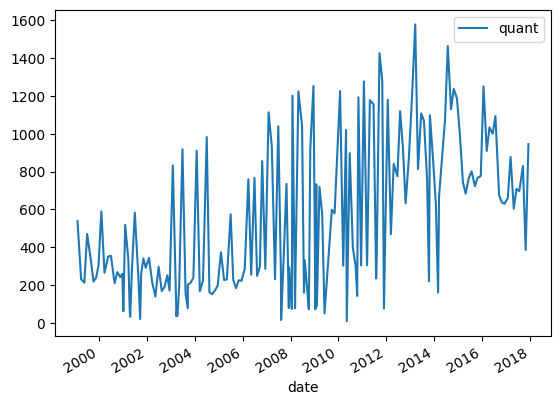

In [39]:
tdf[['quant', 'date']].groupby('date').sum().plot()

In [50]:
new_tdf = tdf[['date', 'quant']].groupby('date').sum()

In [51]:
new_tdf = new_tdf['quant'].rolling(10).mean()
new_tdf.dropna(inplace=True)

<Axes: xlabel='date'>

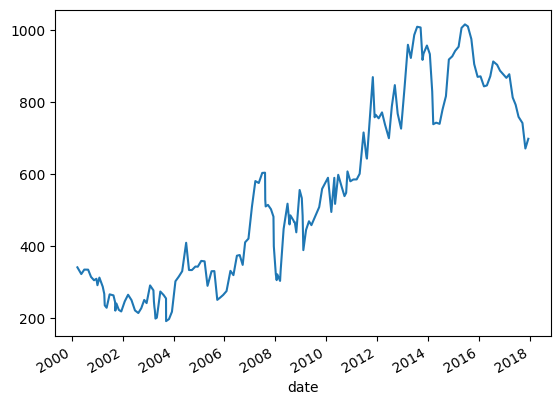

In [52]:
new_tdf.plot()

In [53]:
new_tdf

date
2000-03-21    340.8
2000-05-16    322.1
2000-06-28    334.5
2000-08-22    334.3
2000-10-03    314.2
              ...  
2017-06-14    791.9
2017-07-26    758.2
2017-09-20    741.1
2017-11-01    670.4
2017-12-13    697.4
Name: quant, Length: 168, dtype: float64